<a href="https://colab.research.google.com/github/esthernwagborogu/Adidas-Sales-Data/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def read_(path,**kwargs):
    df=pd.DataFrame()
    try:
        df=pd.read_csv(path)
        print(f'readed from {path}')
    except Exception as e:
        print(e)
    finally:
        return df

In [ ]:
path='/home/abd0g0m3aa/Documents/git/Backpack-Prediction-Challenge/train.csv'
df=read_(path)

readed from /home/abd0g0m3aa/Documents/git/Backpack-Prediction-Challenge/train.csv


In [ ]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [ ]:
df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [ ]:
df.isna().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [ ]:
num_cols=list(df.select_dtypes(include=np.number).drop('id',axis=1).columns)
cat_cols=list(df.select_dtypes(include=['object','string']).columns)

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'Compartments'}>],
       [<AxesSubplot: title={'center': 'Weight Capacity (kg)'}>,
        <AxesSubplot: title={'center': 'Price'}>]], dtype=object)

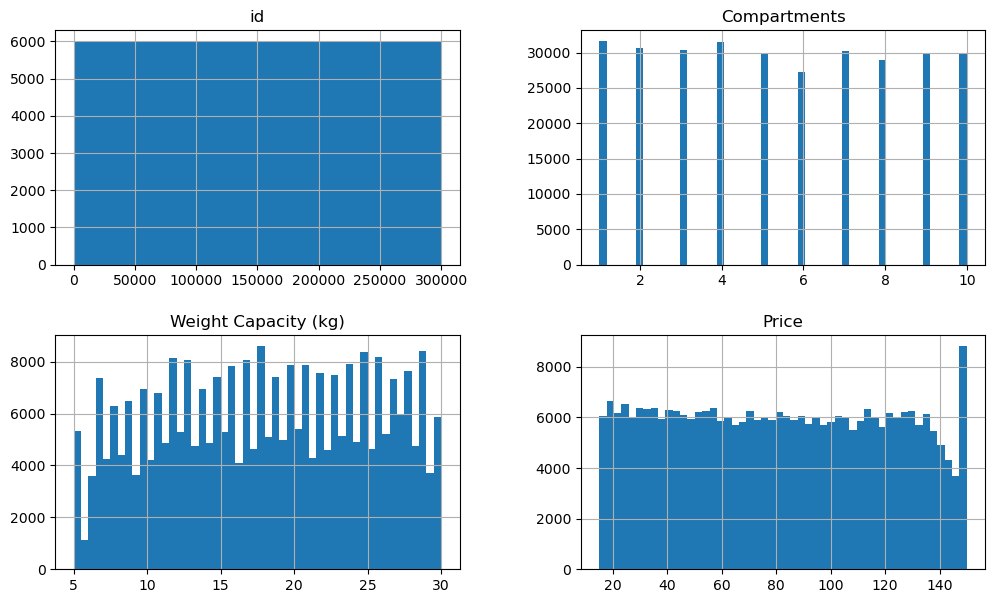

In [ ]:
df.hist(bins=50,figsize=(12,7))

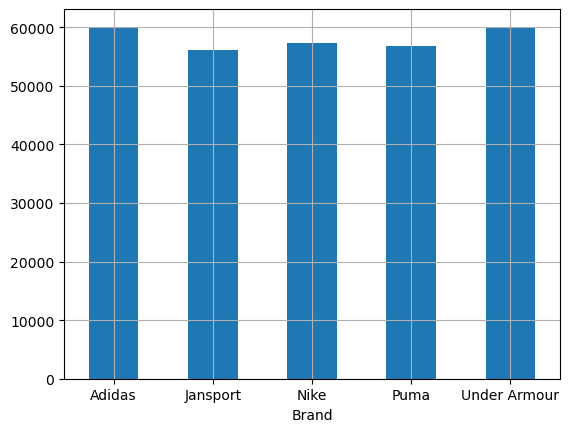

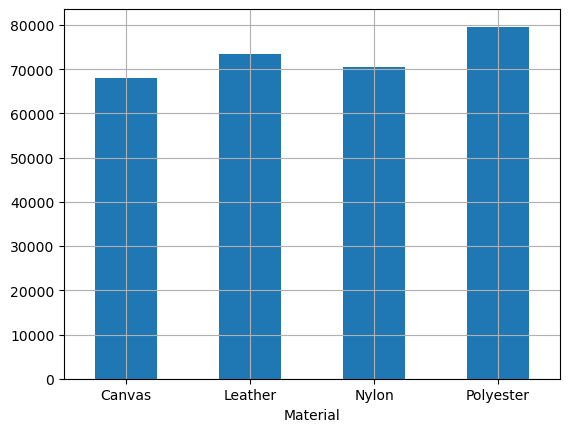

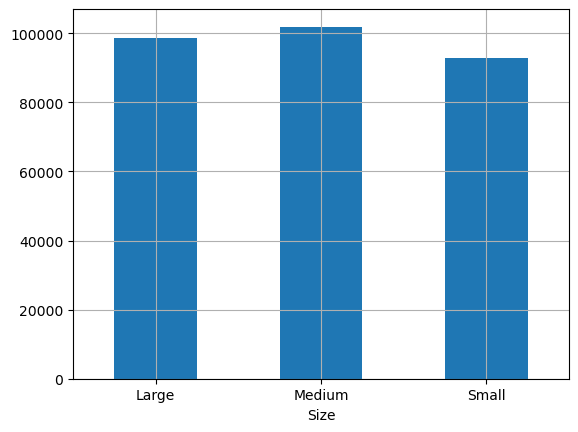

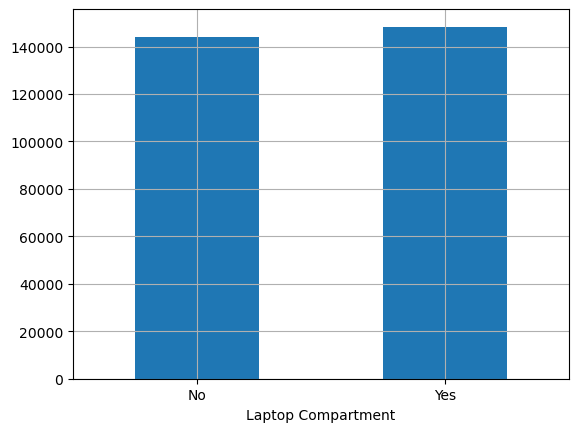

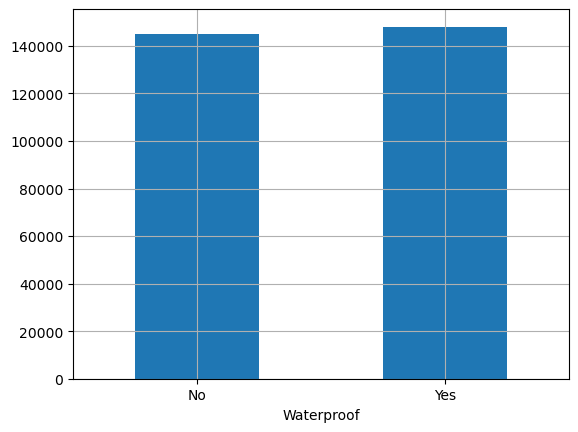

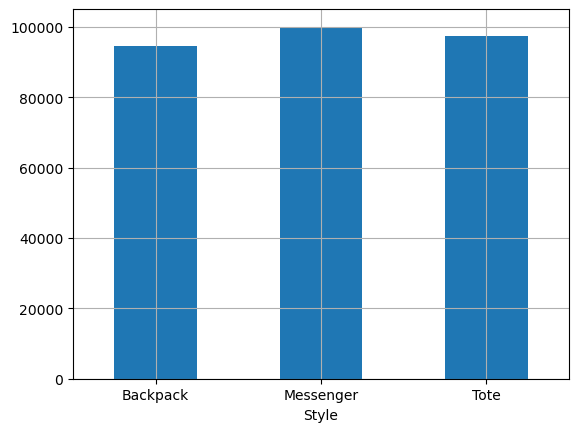

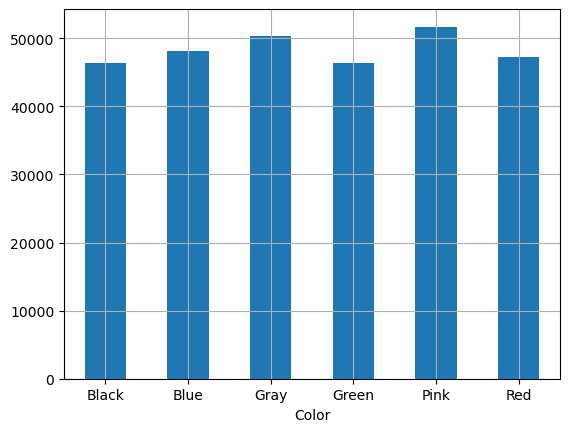

In [ ]:
for col in cat_cols:
    df[col].value_counts().sort_index().plot.bar(rot=0,grid=True)
    plt.xlabel(col)
    plt.show()

In [ ]:
rep_dic={'Yes':1,'No':0}
df['Laptop Compartment'].replace(rep_dic,inplace=True)
df['Waterproof'].replace(rep_dic,inplace=True)

In [ ]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,1.0,0.0,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,1.0,1.0,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,1.0,0.0,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,1.0,0.0,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,1.0,1.0,Messenger,Green,17.749338,86.02312


In [ ]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_selector

In [ ]:
cat_one_hot=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
cat_ordinal=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder()
)
num_pipe=make_pipeline(
    KNNImputer(),
    StandardScaler()
)

In [ ]:
preprocessing=ColumnTransformer([
    ('OneHotCat',cat_one_hot,['Brand','Material','Style','Color']),
    ('ordinalcat',cat_ordinal,['Size']),
    ('num',num_pipe,num_cols+['Laptop Compartment','Waterproof'])

]
)

In [ ]:
df_=preprocessing.fit_transform(df)

In [ ]:
train_=preprocessing.fit_transform(train)

In [ ]:
df2=pd.DataFrame(df_,columns=preprocessing.get_feature_names_out())
df2.head()

,OneHotCat__Brand_Adidas,OneHotCat__Brand_Jansport,OneHotCat__Brand_Nike,OneHotCat__Brand_Puma,OneHotCat__Brand_Under Armour,OneHotCat__Material_Canvas,OneHotCat__Material_Leather,OneHotCat__Material_Nylon,OneHotCat__Material_Polyester,OneHotCat__Style_Backpack,...,OneHotCat__Color_Gray,OneHotCat__Color_Green,OneHotCat__Color_Pink,OneHotCat__Color_Red,ordinalcat__Size,num__Compartments,num__Weight Capacity (kg),num__Price,num__Laptop Compartment,num__Waterproof
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.538408,-0.921380,0.787608,0.995938,-1.020542
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.576198,1.299041,-0.320973,0.995938,0.998571
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,-1.191240,-0.198979,-1.081934,0.995938,-1.020542
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.884338,-0.731091,-0.020574,0.995938,-1.020542
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-1.537170,-0.040262,0.118138,0.995938,0.998571


In [ ]:
df2.to_csv('preprocessed.csv')